<a href="https://colab.research.google.com/github/lseidy/Machine-Learning-Basics/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Naive Bayes

Através de uma tabela de probabilidade construida pelo modelo categoriza os dados
Utilizado para mineração de palavras. Ex: categorizar assuntos do twitter

### Correção laplaciana

Quando a tabela de probabilidade gera valores zerados usamos a Correção laplaciana para resolver o problema (para datasets pequenos)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 data_credit = pd.read_csv('/content/drive/MyDrive/risk_credit.csv')

In [ ]:
data_credit

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
X_risk = data_credit.iloc[:, 0:4].values
y_risk = data_credit.iloc[:,4].values

In [ ]:
lb_enc_historia = LabelEncoder()
lb_enc_divida = LabelEncoder()
lb_enc_garantia = LabelEncoder()
lb_enc_renda = LabelEncoder()
lb_enc_risco = LabelEncoder()

In [ ]:
X_risk[:,0] = lb_enc_historia.fit_transform(X_risk[:,0])
X_risk[:,1] = lb_enc_divida.fit_transform(X_risk[:,1])
X_risk[:,2] = lb_enc_garantia.fit_transform(X_risk[:,2])
X_risk[:,3] = lb_enc_renda.fit_transform(X_risk[:,3])

In [ ]:
X_risk

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
import pickle
with open('risk_credit.pkl', 'wb') as f:
  pickle.dump([X_risk, y_risk],f)

In [ ]:
#Criando algoritmo e gera tabela
naive_risk = GaussianNB()
naive_risk.fit(X_risk, y_risk)

GaussianNB()

In [ ]:
predict_value = naive_risk.predict([[0,0,1,2],[2,0,0,0]])

In [ ]:
predict_value

array(['baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_risk.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_risk.class_count_

array([6., 5., 3.])

In [ ]:
naive_risk.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

##Naive Bayes no credit data

In [ ]:
with open(' ', 'rb') as f:
  X_credit_train, y_credit_train, X_credit_test, y_credit_test = pickle.load(f)

In [ ]:
X_credit_train.shape, y_credit_train.shape

((24435, 3), (24435,))

In [ ]:
X_credit_test.shape, y_credit_test.shape

((8146, 3), (8146,))

In [ ]:
#modelo treinado
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_train, y_credit_train)

GaussianNB()

In [ ]:
predict = naive_credit_data.predict(X_credit_test)

In [ ]:
predict

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
#Comparar o modelo predito com a nossa base de Y teste

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_credit_test, predict)

0.8005155904738522

In [ ]:
confusion_matrix(y_credit_test,predict)

array([[6349,  133],
       [1492,  172]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.8005155904738522

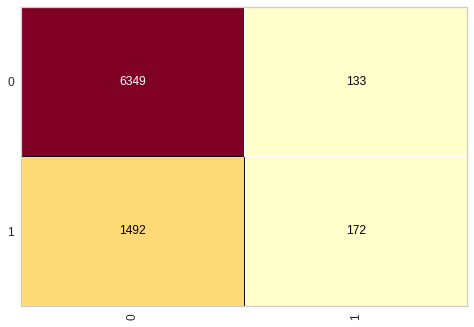

In [ ]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [ ]:
print(classification_report(y_credit_test, predict))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6482
           1       0.56      0.10      0.17      1664

    accuracy                           0.80      8146
   macro avg       0.69      0.54      0.53      8146
weighted avg       0.76      0.80      0.74      8146



##Dados Census

In [ ]:
with open('/content/drive/MyDrive/census.pkl', 'rb') as f:
  #A ordem vem da ordem de salvamento Train tem que ter o mesmo valor e test tem que ter o mesmo valor
  X_census_train, y_census_train, X_census_test, y_census_test = pickle.load(f)

In [ ]:
X_census_test.shape, y_census_test.shape

((4885, 117), (4885,))

In [ ]:
X_census_train.shape, y_census_train.shape

((27676, 117), (27676,))

In [ ]:
#treinamento
naive_census = GaussianNB()
naive_census.fit(X_census_train, y_census_train)
predicted = naive_census.predict(X_census_test)
predicted

array(['>50K', '>50K', '>50K', ..., '>50K', '>50K', '>50K'], dtype='<U5')

In [ ]:
#Comparar resultados do treinamento com os resultados pra ver no teste
y_census_test

22278    <=50K
8950     <=50K
7838     <=50K
16505    <=50K
19140     >50K
         ...  
28592    <=50K
17008    <=50K
25123    <=50K
21036    <=50K
13998    <=50K
Name: income, Length: 4885, dtype: object

In [ ]:
accuracy_score(y_census_test, predicted)

0.4354145342886387

0.4354145342886387

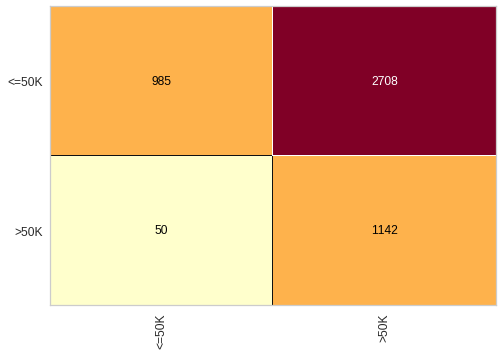

In [ ]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_train, y_census_train)
cm.score(X_census_test, y_census_test)

In [ ]:
#Recall
#   - Identifica 27% das pesssoas que ganham mais de 50 mil e tem precisao e 95%
#   - Identifica 96% das pessoas que ganha menos de 50 mil, mas tem apenas 30% de precisão
print(classification_report(y_census_test, predicted))

              precision    recall  f1-score   support

       <=50K       0.95      0.27      0.42      3693
        >50K       0.30      0.96      0.45      1192

    accuracy                           0.44      4885
   macro avg       0.62      0.61      0.43      4885
weighted avg       0.79      0.44      0.43      4885

